# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Thoreenz Soldevilla\
_Student No._: 2021-04225\
_Section_: THQ-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldevilla

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from cmath import *

In [50]:
def f1(x, N):
    return sin(pi*x/N)*sin(20*pi*x/N)
f1_xdata = np.linspace(0, 1000, 1000)
f1_ydata = []
for i in range(len(f1_xdata)):
    f1_ydata.append(f1(i, 1000))

In [51]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


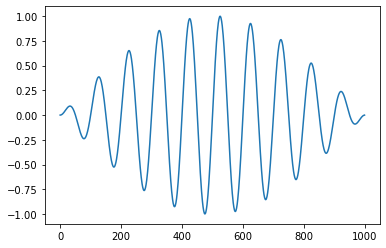

In [52]:
plt.plot(f1_xdata, f1_ydata)
plt.show()

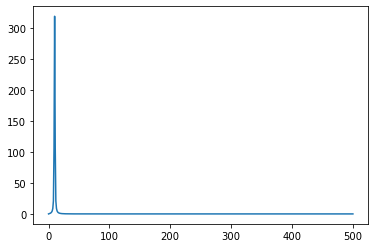

In [64]:
plt.plot(np.abs(dft(f1_ydata)))
plt.show()

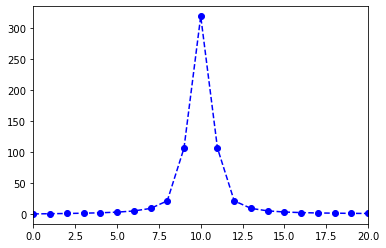

In [62]:
plt.plot(np.abs(dft(f1_ydata)), 'bo--')
plt.xlim(0,20)
plt.show()

In [66]:
f1_ydata_ft = dft(f1_ydata)
f1_ydata_ft[0:20]

array([ 4.42738565e-14  +0.j        , -1.95000266e-14  +0.32645282j,
        5.17427355e-15  +0.69469161j,  3.90909093e-16  +1.16078813j,
        3.06165412e-14  +1.81941714j,  7.75681602e-15  +2.86118021j,
        3.13431193e-14  +4.74138439j, -2.59828780e-14  +8.81897506j,
       -1.84815000e-14 +20.97485977j,  2.67020293e-14+105.88270624j,
        5.47917831e-15-318.50895449j, -2.50875221e-13+105.92274503j,
       -3.40377412e-14 +21.0561576j , -3.01386520e-15  +8.94406678j,
       -2.33181530e-14  +4.91432226j, -2.81214938e-15  +3.08787616j,
        2.12658396e-14  +2.10818122j,  3.88100197e-14  +1.52316082j,
       -2.11859610e-14  +1.14673944j, -1.71089542e-14  +0.89082855j])

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [54]:
dow = np.loadtxt("dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [55]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

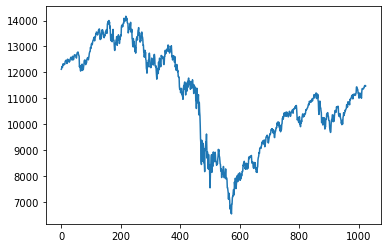

In [56]:
plt.plot(dow)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


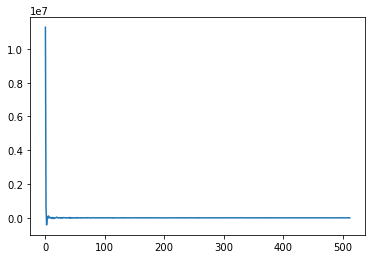

In [57]:
dow_ft = np.fft.rfft(dow)
plt.plot(dow_ft)
plt.show()

In [58]:
dow_ft_2 = np.copy(dow_ft)
for i in range(len(dow_ft_2)-(len(dow_ft_2)//10)):
    ind = -i-1
    dow_ft_2[ind] = 0
print(dow_ft[450:-1])
print(dow_ft_2[450:-1])

[ -709.63438147 -933.4219067j   1192.01938939+1760.96589247j
   956.93295614 -421.61086067j   585.30753264 -180.88117108j
  1605.77244817-1823.46648907j   428.10083625 +268.06706001j
   975.97215276+1918.19291713j  3706.019186  +1417.0623103j
  -727.79622454-1007.45126077j  -468.46647524+2805.49721705j
 -1045.70619343 +448.6457245j   1617.38086003 -624.12593403j
 -1539.84586791-3026.35839624j  3287.2063742 +2748.76123887j
   296.85779287+1577.87386902j   -52.6008855  -306.32502139j
  2108.55124639+2741.86005047j -2380.83167657-1872.91892565j
   118.4962577 -1470.50210797j -1127.93654224+1249.16315385j
   -15.52735026-2175.28613521j  2229.47562865 +625.97719335j
  -529.8304521 -2033.90078817j  -159.60238944  -74.10954905j
  -857.03401698+1526.56931317j  -288.41726227 +527.59236683j
  1280.77150201 -140.5259332j   1642.21840059 +781.42479838j
  -683.85230033+1520.17052933j   709.19524012+1666.19183165j
   160.57942618-1060.82015384j  2203.40464674 -124.46695604j
  -436.04231538 -982.1065

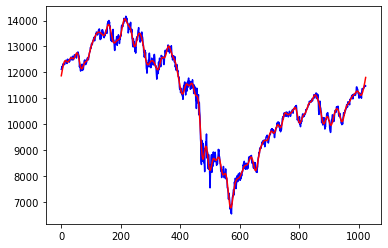

In [59]:
dow_2 = np.fft.irfft(dow_ft_2)
plt.plot(dow, color='blue')
plt.plot(dow_2, color='red')
plt.show()